In [16]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Variables
activities: list[str] = ['Elicitation', 'Analysis', 'Modeling', 'Validation & Verification', 'Management', 'Other']
tasks: list[str] = ['Detection', 'Extraction', 'Classification', 'Modeling', 'Tracing & Relating', 'Search & Retrieval', 'Generation']

In [8]:
# load the data
df = pd.read_excel('../data/nlp4re-tools-data.xlsx', sheet_name='Potential Articles', skiprows=2)

# filter for articles that have been included
dfinc = df[df['Verdict']=='included']

[Text(0.5, 1.0, 'Tools by Activity and Task Type'),
 Text(0.5, 3.722222222222216, 'Task Type'),
 Text(20.722222222222214, 0.5, 'RE Activity')]

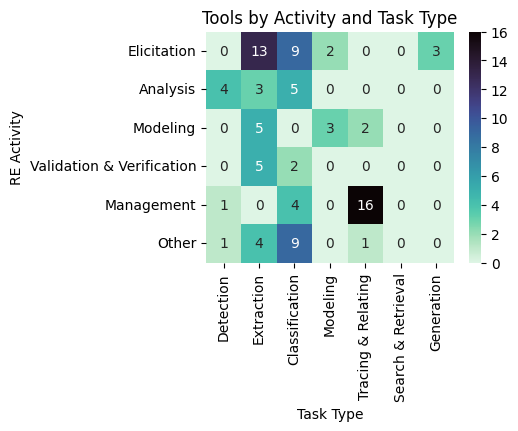

In [19]:
# determine the amount of tools per activity x task combination
combinations: dict = df[['RE Activity', 'Tool Task']].value_counts().to_dict()

# construct a matrix
matrix = {activity: [0]*len(tasks) for activity in activities}
for activity in activities:
    for tid, task in enumerate(tasks):
        amount = 0
        if (activity, task) in combinations:
            amount = combinations[(activity, task)]
        matrix[activity][tasks.index(task)] = amount

# turn the matrix back into a dataframe
dfmatrix = pd.DataFrame.from_dict(matrix, orient='index', columns=tasks)

# visualize the matrix as a heatmap
plt.figure(figsize=(4,3))
viz = sns.heatmap(data=dfmatrix, cmap='mako_r', annot=True)
viz.set(title='Tools by Activity and Task Type', xlabel='Task Type',
            ylabel='RE Activity')